# 陪聊行业店员营业趋势分析
本项目是为了在有限公开信息下推断店员营业行为,从而逆向推导出店员的营业行为,发现更多内在规律.对于客户来说,店员的营业行为无法被直接观测.但是,有2种可被观测公开信息:1.店员排名.2.店员打赏.因此,假设店员的业绩与2种变量之间存在某种映射关系,只需要分析店员排名变化时间趋势,找出重要变化点,再结合打赏信息,就能够在一定假设下,近似还原出店员的营业行为特征.

从微观主体上推断店员营业行为,对研究陪聊行业是非常重要的.首先,研究店员行为,可以得到陪聊行业市场需求最活跃的时间段,从而侧面反映出市场的消费习惯.其次,对所有(大多数)陪聊平台的服务供给进行加总,可以得到市场的总供给曲线,总而更好研究该市场随时间的变化趋势,以及在遭受外部冲击时的反应.

![img](assets/img.png )

本项目建立的假设如下:
**1.排名到业绩之间的映射是连续的,业绩的任何变化都会反映在排名上.2.每个等级对应的排名具有无限的上下界.3.店员的数量是无限个,且业绩差距非常小.**

在现实中,往往不能满足上述假设,因此只能够得到一个近似的模型,但是该模型已经足够揭示大部分内在规律和结论了.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyarrow.dataset as ds
import numpy as np

plt.rcParams['font.family'] = 'Arial'
# 23bac44c7c493266ab703d25588399c58a4667d8c56409d9


# 行为分析

In [29]:
# 江琦,瑶到外婆桥🌙 筱筱
DS_PATH = '/Users/colin/Documents/DataSets/Test/2023-Escort'
GZH_NAME = 'tj5uhmrpeq'  #tj5uhmrpeq fhpkn3rf85
USER_ID = '牛奶秋刀鱼'  #小水✨指定 小水 小水✨
RANK_THRESHOLD = 3
RESAMPLE_T = '3T'


#32fe42f704814611d5587380f34bf2347db1262f309ea4cb

 
# 读取数据
def read_ds_1(df) -> pd.DataFrame:
    df['Online'] = np.where(df['Online'] == '在线', True, False)
    df['Sex'] = np.where(df['Sex'].str[-16:-13] == '255', True, False)
    df['Grade'] = df['Grade'].str[0:2]
    df['Text'] = np.where(df['Service'].str.contains('文语'), True, False)
    df['Call'] = np.where(df['Service'].str.contains('连麦'), True, False)
    df['Video'] = np.where(df['Service'].str.contains('视频'), True, False)
    df['Game'] = np.where(df['Service'].str.contains('游戏'), True, False)
    # 处理在线但是不提供服务
    df['Online'] = df['Online'] * (df['Text'] + df['Call'] + df['Video'] + df['Game'])

    df = df.astype(
            dtype={'Name': 'category', 'Age': 'uint8', 'Sex': 'bool', 'Online': 'bool', 'Grade': 'uint8', 'Rank': 'uint16'})
    return df


def read_ds_2(df):
    df['Online'] = np.where(df['Online'].str.contains('在线'), True, False)
    df['Call'] = np.where(df['Service'].str.contains('语音连麦'), True, False)
    df['Game'] = np.where(df['Service'].str.contains('游戏陪玩'), True, False)
    df['Age'] = np.where(df['Age'] == '', 0, df['Age'])
    # 处理在线但是不提供服务
    df.drop(columns=['GradeImg'], inplace=True)
    df = df.astype(
            dtype={'Name': 'category', 'Age': 'uint8', 'Online': 'bool', 'Rank': 'uint16'})
    # 多昵称处理
    return df


def read_select(gzh_name):
    """
    选择处理方法
    """
    df = ds.dataset(f'{DS_PATH}/{GZH_NAME}/user_daily_data/').to_table().to_pandas()
    match gzh_name:
        case 'tj5uhmrpeq': df_r = read_ds_1(df)  # 糖恋
        case 'fhpkn3rf85': df_r = read_ds_2(df)  #
        case _: raise
    #
    df_r.drop(columns=['Service'], inplace=True)
    return df_r


def map_name(df):
    # 小水✨指定 小水 小水✨桑稚
    # replace_dict = {'桑稚你的私有物❤': '桑稚❤️ 想指定', '桑稚❤️ 想要指': '桑稚❤️ 想指定'}
    # df['Name'] = df['Name'].map(lambda x: replace_dict.get(x, x))
    return df


# user_data.memory_usage(deep=True).sum() / 1024 / 1024  # 2859
user_data = map_name(read_select(GZH_NAME))

user_data

,Name,Age,Sex,Online,Grade,Date,Rank,Text,Call,Video,Game
0,糖恋客服-安鱼,19,True,False,40,2023-06-15 13:52:23.814347,0,False,False,False,False
1,客服阮-店员推荐,18,True,False,40,2023-06-15 13:52:23.814347,1,False,False,False,False
2,樱奈.,20,True,True,40,2023-06-15 13:52:23.814347,2,True,True,True,True
3,情场职场实战军师,30,False,True,40,2023-06-15 13:52:23.814347,3,True,True,False,True
4,江苏车银优,18,False,True,40,2023-06-15 13:52:23.814347,4,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8226770,耶耶崽,19,True,False,10,2023-06-28 13:56:53.102308,245,True,False,False,True
8226771,向阳,21,False,False,10,2023-06-28 13:56:53.102308,246,True,True,False,True
8226772,痣.,26,True,False,10,2023-06-28 13:56:53.102308,247,True,True,True,True
8226773,初语,24,True,False,10,2023-06-28 13:56:53.102308,248,False,True,False,False


In [30]:
user_data[user_data['Name'].str.contains('颖颖')]['Name'].unique()

array(['颖颖，'], dtype=object)

## 0.数据筛选

In [31]:
user_data.query("Name==@USER_ID")

,Name,Age,Sex,Online,Grade,Date,Rank,Text,Call,Video,Game
213,涵涵,22,True,False,10,2023-06-15 13:52:23.814347,213,True,True,False,True
471,涵涵,22,True,False,10,2023-06-15 13:53:00.040783,213,True,True,False,True
729,涵涵,22,True,False,10,2023-06-15 13:53:33.192290,213,True,True,False,True
987,涵涵,22,True,False,10,2023-06-15 13:54:11.991626,213,True,True,False,True
1245,涵涵,22,True,False,10,2023-06-15 13:54:50.881496,213,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8225591,涵涵,24,True,True,10,2023-06-28 13:53:09.767939,66,True,True,False,True
8225841,涵涵,24,True,True,10,2023-06-28 13:53:47.952212,66,True,True,False,True
8226091,涵涵,24,True,True,10,2023-06-28 13:54:58.668109,66,True,True,False,True
8226341,涵涵,24,True,True,10,2023-06-28 13:55:34.385610,66,True,True,False,True


## 1.全体重采样
在爬虫任务中,由于网络等多方面因素,爬取到的时间戳是不规律的.因此需要进行重采样,转为指定间隔的数据.

In [32]:
# 按规则重新采样
df_user = user_data[['Date', 'Name', 'Online', 'Rank']]
del user_data

# 重新采样
df_res = df_user.set_index('Date').groupby('Name').resample(RESAMPLE_T).first().drop(columns=['Name'])  #聚合操作
df_res['Online_Change'] = df_res.groupby('Name')['Online'].transform(lambda x: x - x.shift(1))

# 统计离线变更
df_res = df_res.reset_index()
df_res

,Name,Date,Online,Rank,Online_Change
0,007,2023-06-23 21:27:00,True,116.0,NaN
1,007,2023-06-23 21:30:00,True,116.0,0
2,007,2023-06-23 21:33:00,True,115.0,0
3,007,2023-06-23 21:36:00,True,113.0,0
4,007,2023-06-23 21:39:00,True,114.0,0
...,...,...,...,...,...
1595479,🦈,2023-06-26 00:18:00,0.0,240.0,0.0
1595480,🦈,2023-06-26 00:21:00,0.0,240.0,0.0
1595481,🦈,2023-06-26 00:24:00,0.0,231.0,0.0
1595482,🦈,2023-06-26 00:27:00,0.0,231.0,0.0


## 2.计算离线冲击
店员排名发生变化的原因除了自身业绩变化以外，离线冲击（offline impact）是另一个很重要的因素。这对于研究市场供给是非常重要的，其他店员离线会导致陪聊服务存量减少，因此在线的店员有望获得更多的订单（前提是市场需求不会相应减少，或减少幅度小于离线冲击效应）。当其他店员离线以后，该店员的排名会上升。因此剥离出离线冲击效应，可以将店员的排名变化分解为两类：1.内生的业绩变化因素。2.外生的离线冲击因素。

In [33]:
# 面板数据拼接
df_id = pd.merge(df_res, df_res[df_res['Name'] == USER_ID][['Date', 'Rank']], on='Date', how='left')

# 找出排名在前面的 T-1 时刻
# Rank_y 是目标用户的排名
df_id['Rank_z'] = (df_id.groupby('Name').apply(lambda x: x['Rank_x'].shift(1) < x['Rank_y']).reset_index(level=0, drop=True))
df_id['Rank_flag'] = df_id['Rank_z'] * df_id['Online_Change']

# Rank_flag-1的行,为离线冲击
df_id['Off_shock'] = df_id.groupby('Date')['Rank_flag'].transform(lambda x: (x == -1).sum())
df_id['Online_Total'] = df_id.groupby('Date')['Online'].transform('sum')

# 转为时间序列数据
df_id = df_id.query("Name==@USER_ID").set_index('Date')

# 计算排名变化
df_id['Rank_add'] = ((-(df_id['Rank_x'] - df_id['Rank_x'].shift(1)) - df_id['Off_shock']) * (1 - df_id['Online_Change'].abs()))

df_id

,Name,Online,Rank_x,Online_Change,Rank_y,Rank_z,Rank_flag,Off_shock,Online_Total,Rank_add
Date,,,,,,,,,,
2023-06-15 13:51:00,涵涵,0.0,213.0,NaN,213.0,False,NaN,0,131.0,NaN
2023-06-15 13:54:00,涵涵,0.0,213.0,0.0,213.0,False,0.0,0,132.0,-0.0
2023-06-15 13:57:00,涵涵,0.0,213.0,0.0,213.0,False,0.0,0,132.0,-0.0
2023-06-15 14:00:00,涵涵,0.0,213.0,0.0,213.0,False,0.0,1,132.0,-1.0
2023-06-15 14:03:00,涵涵,0.0,213.0,0.0,213.0,False,0.0,0,134.0,-0.0
...,...,...,...,...,...,...,...,...,...,...
2023-06-28 13:42:00,涵涵,1.0,65.0,0.0,65.0,False,0.0,0,130.0,-0.0
2023-06-28 13:45:00,涵涵,1.0,64.0,0.0,64.0,False,0.0,1,129.0,0.0
2023-06-28 13:48:00,涵涵,1.0,66.0,0.0,66.0,True,0.0,0,131.0,-2.0


## 预测任务

/opt/homebrew/Caskroom/miniconda/base/envs/Spider/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1920x1440 with 0 Axes>

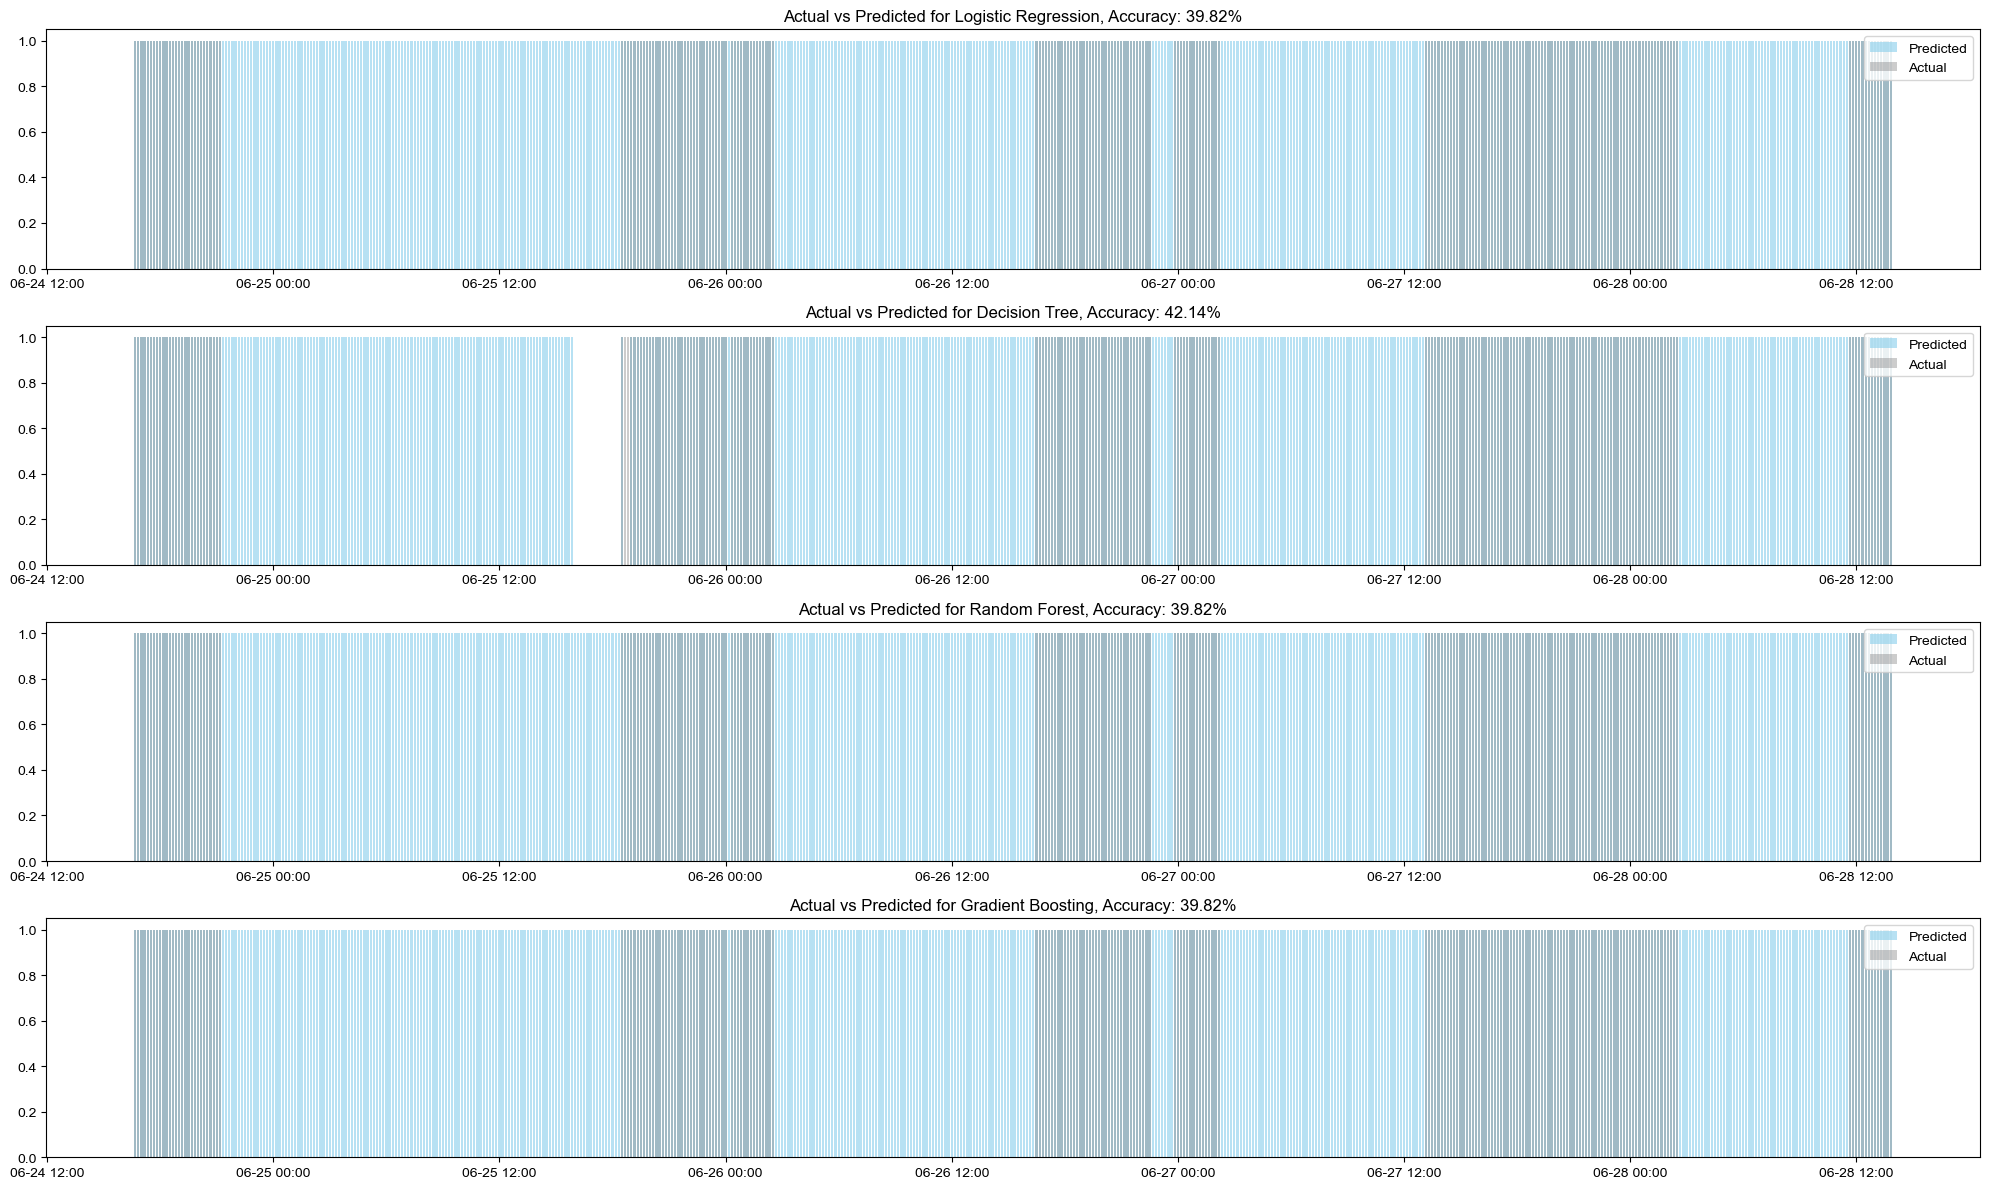

In [34]:
# 特征工程
# 我有一个以分钟为单位时间序列数据，跨越了一周。其中Date列是日期,Online列是上线状态，用户在一天中的任意时间均有可能上线，且上线时间可能有很多次。我需要进行一个预测任务，根据前五天的上线行为，预测第六天在哪个时间段上线。特征工程列是Online_Total，其表示当前在线总人数
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


def create_fe(df):
    """
    特征工程
    """

    df = df[['Online', 'Online_Total']]
    # 重新采样
    df = df.resample('10T').first()

    # 创建滞后特征
    for i in range(1, 10):
        df[f'Online_Total_L{i}'] = df['Online_Total'].shift(i)

    # 创建滑动窗口特征
    for i in range(3, 10, 3):
        df[f'Online_Total_RM{i}'] = df['Online_Total'].rolling(window=i).mean()

    # 删除缺失值
    df.dropna(inplace=True)

    # 提取日期
    df['Day'] = df.index.day
    df['Hour'] = df.index.hour
    df['Minute'] = df.index.minute
    df['DayOfWeek'] = df.index.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    df['DayOfYear'] = df.index.dayofyear

    return df


def fit_model(df):
    # 把数据分为训练集和测试集
    train_size = int(len(df) * 0.7)
    train, test = df[0:train_size], df[train_size:len(df)]
    X_train, y_train = train.drop('Online', axis=1), train['Online'].astype('int')
    X_test, y_test = test.drop('Online', axis=1), test['Online'].astype('int')

    # 定义模型
    models = {
            "Logistic Regression": LogisticRegression(),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "Gradient Boosting": GradientBoostingClassifier()
    }

    # 创建一个足够大的图，以容纳所有模型的预测结果
    plt.figure(dpi=300)
    fig, axs = plt.subplots(len(models), 1, figsize=(20, 3 * len(models)))
    # plt.figure(figsize=(10, 5))

    # 对于每一个模型
    for i, (name, model) in enumerate(models.items()):
        # 训练模型
        model.fit(X_train, y_train)
        # 在测试集上做预测
        predictions = model.predict(X_test)
        # 计算准确率
        accuracy = accuracy_score(y_test, predictions)
        # print(f"{name} Accuracy: {accuracy * 100:.2f}%")

        # 创建一个新的DataFrame来存储预测结果和真实结果
        results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=X_test.index)

        # 日期格式
        axs[i].xaxis_date()  # 设置日期轴
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))  # 日期格式

        # 在子图中绘制预测结果和真实结果
        axs[i].bar(X_test.index, results['Predicted'], label='Predicted', color='skyblue', alpha=0.6, width=0.005)
        axs[i].bar(X_test.index, results['Actual'], label='Actual', color='grey', alpha=0.4, width=0.005)

        # axs[i].plot(results['Predicted'], label='Predicted', alpha=0.7)
        # axs[i].plot(results['Actual'], label='Actual', alpha=0.7)
        axs[i].set_title(f'Actual vs Predicted for {name}, Accuracy: {accuracy * 100:.2f}%')
        axs[i].legend()

    # 展示图
    plt.tight_layout()
    plt.show()


fit_model(create_fe(df_id))
# create_fe(df_id)

## 3.可视化

<Figure size 1920x1440 with 0 Axes>

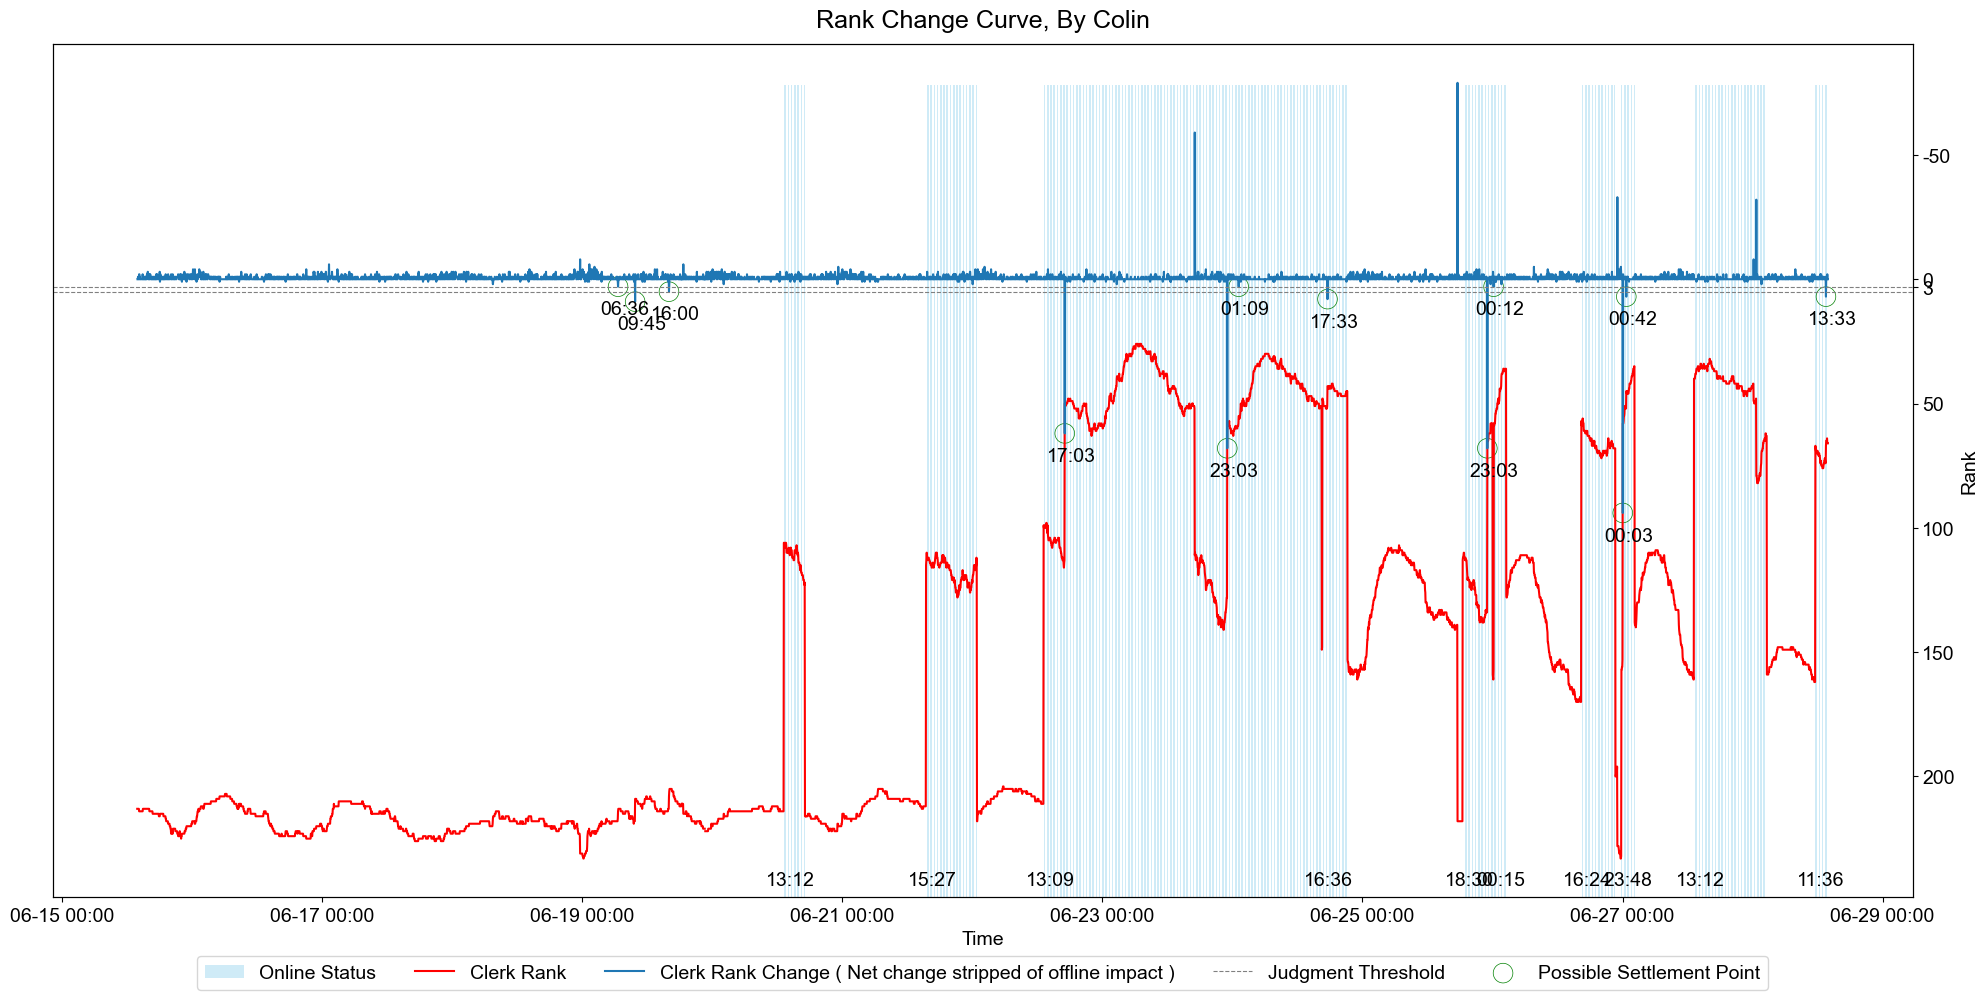

In [35]:
# 图像大小
plt.figure(dpi=300)
fig, axis = plt.subplots(figsize=(20, 10))
X = df_id.index  # x轴来源


def create_main(ax1):
    """
    绘制主要值
    :return:
    """
    #--------------- X轴 ---------------#
    ax1.xaxis_date()  # 设置日期轴
    # ax1.xaxis.set_major_locator(mdates.HourLocator(interval=12))  # 显示频率
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))  # 日期格式
    # plt.gcf().autofmt_xdate()  # 旋转并对齐日期标签以防止它们重叠
    # ax1.set_ylabel('Online Status')
    ax1.set_title(f'Rank Change Curve, By Colin', fontsize=18, y=1.01)
    ax1.grid(False)  # 添加网格
    ax1.set_xlabel('Time', fontsize=14)

    #--------------- Y主轴 ---------------#
    ax1.bar(X, df_id['Online'], width=0.001, align='edge', color='skyblue', alpha=0.4, label='Online Status')  # 创建柱状图
    ax1.set_yticks([])  # 隐藏刻度线
    ax1.tick_params(axis='both', labelsize=14)  #轴文字大小

    #--------------- Y次轴1 ---------------#
    ax2 = ax1.twinx()  # 创建共享x轴的第二个轴
    ax2.plot(X, df_id['Rank_x'], 'r-', label='Clerk Rank')  # 创建折线图
    ax2.set_ylabel('Rank', fontsize=14)
    ax2.invert_yaxis()  # 逆转第二个y轴的顺序

    #--------------- Y次轴2 ---------------#
    ax2.plot(X, df_id['Rank_add'], label='Clerk Rank Change ( Net change stripped of offline impact )')  # 创建折线图
    ax2.axhline(y=RANK_THRESHOLD, color=(0.5, 0.5, 0.5, 1), linestyle='--', linewidth=0.8)  # 添加水平参考线
    ax2.axhline(y=5, color=(0.5, 0.5, 0.5, 1), linestyle='--', linewidth=0.8, label='Judgment Threshold')  # 添加水平参考线
    ax2.tick_params(axis='both', labelsize=14)  # 轴文字大小

    #--------------- 刻度线 ---------------#
    locs, labels = plt.yticks()  # 获取当前的刻度位置和标签
    plt.yticks(list(locs) + [RANK_THRESHOLD], list(labels) + [str(RANK_THRESHOLD)])  # 添加新的刻度位置和标签

    return ax1, ax2


def create_ann(ax1, ax2):
    """
    绘制标注
    :param ax1:
    :param ax2:
    :return:
    """

    #--------------- Y次轴标注---------------#
    # 找到大于1的部分
    y_gt = df_id['Rank_add'] >= RANK_THRESHOLD
    x_gt = X[y_gt]
    y_gt = df_id['Rank_add'][y_gt]
    # 在这些点上绘制红色的圆圈
    ax2.scatter(x_gt, y_gt, color='green', marker='o', linewidths=0.5, s=200, facecolors='none', label='Possible Settlement Point')

    # 条件标注
    lower_y = ax2.get_ylim()[0] - 5
    for i in range(len(X)):
        if df_id['Rank_add'][i] >= RANK_THRESHOLD:  # 排名变化值
            ax2.annotate(X[i].strftime('%H:%M'), (X[i], df_id['Rank_add'][i]), xytext=(-13, -20), textcoords='offset points', fontsize=14)
        if df_id['Online_Change'][i] == 1:  # 在线变化值
            ax2.annotate(X[i].strftime('%H:%M'), (X[i], lower_y), xytext=(-13, 0), textcoords='offset points', fontsize=14)

    #--------------- 图例 ---------------#
    handles, labels = [], []
    for ax in [ax1, ax2]:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            handles.append(handle)
            labels.append(label)

    plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=len(handles), fontsize=14)


# 绘图
create_ann(*create_main(axis))

# 自动旋转日期标签以避免重叠
# fig.autofmt_xdate()

# 我有250名店员每天时间的数据，如何选择一种模型，来预测某名店员的第二天上线时间
plt.tight_layout()
plt.show()

结论：该图像表明，店员在当天的经营活动中，分别在3:04和4:40发生了2次排名跳升。

- 其中，第一次跳升处于离线状态，第二次跳升处于在线状态（蓝色阴影部分）。蓝色实线为剥离了其他店员离线冲击后的排名变化情况，这2次排名跳升在剥离了离线冲击后仍然大于一定的阈值（灰色虚线）。因此，结合前文的假设下可以推断出，该店员排名跳升是2笔订单结算带来的业绩变化，而非外生的离线冲击。

- 另外一个结论是，结合该店员在线状态变化可以分析出，这2笔订单可能为语音连麦订单，因此店员有动机将状态变更为离线，防止新订单进入而扰乱生产计划。比起店员从在线状态变为离线状态，店员从离线状态变为在线状态更加重要。前者可能是系统强制下线所致，而后者是店员的自主决策行为，更能反映店员经营活动的特征。

**经过与该店员的核对，以上推论与事实相符。**这表明，排名变化曲线图在一定假设下能反映店员经营与决策的特点。但是市场并不是完全前文符合假设的，该模型旨在提供一种在有限公开信息下逆向推导店员经营活动特征的工具。受限于各方面的原因，作为一个雏形，本工具仍然有诸多不完善之处。但是，作为市场上**第一个陪聊行业外部分析工具**，其思路和工程代码或许能为同行提供一些微不足道的借鉴。

# 打赏分析

In [36]:
# map_name(pd.read_parquet(f'{DS_PATH}/{GZH_NAME}/snapshots/gift-add')).query("Name==@USER_ID")
user_gift = map_name(pd.read_parquet(f'{DS_PATH}/{GZH_NAME}/snapshots/gift-add')).query("Name==@USER_ID")
user_gift

,Name,Content,Num,Date
831,涵涵,颗,99.99,2023-06-25 22:53:51.434528
902,涵涵,深海梦境,1.00,2023-06-26 23:53:54.350107


In [37]:
#筛选
add_gift = pd.read_parquet(f'{DS_PATH}/{GZH_NAME}/snapshots/gift-add').query("Name==@USER_ID")

# 映射
price_dict = {
        '糖果': 1, '生日蛋糕': 52, '糖果飞船': 52, '梦幻泡沫': 52, '仲夏之梦': 99, '萤火之光': 99, '深海梦境': 188,
        '星愿流星': 288, '萤火之恋': 520, '赛博世界': 999, '天空之城': 1288, '童话归宿': 2888,
}

add_gift['Price'] = add_gift['Content'].map(price_dict)
add_gift['Total'] = add_gift['Price'] * add_gift['Num']
add_gift

,Name,Content,Num,Date,Price,Total
902,涵涵,深海梦境,1.0,2023-06-26 23:53:54.350107,188,188.0


## 礼物汇总统计

In [38]:
# # 分组计算
# add_gift['day'] = add_gift['date'].dt.date
# add_gift['day_total'] = add_gift.groupby(['day', 'name'], as_index=False)['total'].transform(sum)
# day_gift = add_gift.groupby(['day', 'name'], as_index=False).first()[['day', 'name', 'day_total']]
#
# # 展示
# day_gift.groupby(['day', 'name']).first().sort_values(by=['day', 'day_total'], ascending=False)

## 可视化

In [39]:
# # Group by salesperson and sum the amounts
# sales_summary = id_data.groupby('name')['total'].sum().sort_values(ascending=False)
#
# # Create the bar chart
# sales_summary.plot(kind='bar')
#
# plt.title('Sales by Salesperson')
# plt.ylabel('Amount')
# plt.show()